To read images from pdf and to save in images folder

In [1]:
from docs_helper import load_image_data

In [2]:
load_image_data()

Reading images frm pdf and saving to folder is completed


importing and initializing supabase client for mainataing images in supabase storage

In [3]:
from docs_helper import SupaBaseOperations

In [4]:
supabase = SupaBaseOperations()

In [6]:
supabase.upload_files_to_supabase()

To import llm operations related codes for image to text conversion, embedding creations...

In [7]:
from llm_client import LLMOperations

In [8]:
llm_operations = LLMOperations()

To generate image equivalent texts using LLAMA vision model from together(free version) and store them in a image_contents.json file

In [9]:
import os
image_to_text=[]
for image in os.listdir("images"):
    image_content = llm_operations.get_image_to_text(image)
    image_to_text.append({image:image_content})

In [10]:
import json
with open("image_contents.json", 'w') as json_file:
    json.dump(image_to_text, json_file, indent=4)

to read text data/chunks from pdf

In [11]:
from docs_helper import load_pdf_data
text_data = load_pdf_data()

In [12]:
from handle_vectors import create_vectors_processed

to create text data embedding vectors

In [13]:
text_embeddings = create_vectors_processed(text_data)

In [14]:
import json
with open("image_contents.json", 'r') as json_file:
    image_data = json.load(json_file)

to create image text data embedding vectors

In [15]:
from handle_vectors import create_vectors_for_image_data
image_embeddings = create_vectors_for_image_data(image_data,len(text_embeddings))

to store created vectors in pinecone vector db

In [16]:
from handle_vectors import store_vectors_processed
all_vectors = text_embeddings + image_embeddings
store_vectors_processed(all_vectors)

#### RAG application flow for Yoga questions

In [17]:
from app import Application

app = Application()

C:\Users\SANDEEP N\py_nbs\multimodal_answering_app\handle_vectors.py:59: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = SentenceTransformerEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


C:\Users\SANDEEP N\py_nbs\multimodal_answering_app\app.py:22: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = self.qa({"query":query})


Nataraja is another name for Shiva, the Lord of the Dance, whose cosmic dance is the creation and destruction of the world.
Image below might give you more details/posture for your query


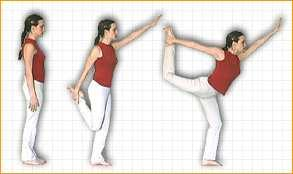

In [18]:
app.get_answer("Give details about Nataraja pose")

In [19]:
app.get_answer("what are instructions for doing that?")

1. Lie flat on the back with your legs together but not touching, and your arms close to the body with the palms facing up. 
2. Keep your eyes gently closed with the facial muscles relaxed and breath deeply and slowly through the nostrils. 
3. Starting at the top of the head and working your way down to the feet, bring your attention to each part of your body, consciously relaxing it before proceeding on to the next. 
4. While exhaling, bring the left foot together with the right. Keep arms straight, raise the hips and align the head with the arms, forming an upward arch. 
5. Exhale and lower the body to the floor until the the feet, knees, hands, chest, and forehead are 
touching the ground. 
6. Kneel on the floor and lean forward placing the elbows and forearms flat on the floor with the palms facing down. Your arms should be placed about shoulder-distance 
apart. 
7. Extend your head forward and lift it as high as possible. 
8. Raise the buttocks and place the feet firmly on the bot

In [20]:
app.get_answer("How to do Padmasana")

Place the hands on the knees, palms down.
